### Importing packages

In [1]:
import math
from sklearn.datasets import load_boston
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor,RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [5]:
X = boston.data
y = boston.target
features = boston.feature_names
print(features)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


Housing Values in Suburbs of Boston
The medv variable is the target variable.

**Data description**
The Boston data frame has 506 rows and 14 columns.

This data frame contains the following columns:

crim
per capita crime rate by town.

zn
proportion of residential land zoned for lots over 25,000 sq.ft.

indus
proportion of non-retail business acres per town.

chas
Charles River dummy variable (= 1 if tract bounds river; 0 otherwise).

nox
nitrogen oxides concentration (parts per 10 million).

rm
average number of rooms per dwelling.

age
proportion of owner-occupied units built prior to 1940.

dis
weighted mean of distances to five Boston employment centres.

rad
index of accessibility to radial highways.

tax
full-value property-tax rate per \$10,000.

ptratio
pupil-teacher ratio by town.

black
1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town.

lstat
lower status of the population (percent).

medv
median value of owner-occupied homes in \$1000s.

In [6]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
df['MEDV'] = boston.target
df_copy = df.copy()
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [8]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Training with models and observing metrics values

In [10]:
df.columns[:-1]

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT'],
      dtype='object')

In [11]:
X = df[df.columns[:-1]]
y = df['MEDV']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [13]:
model1 = XGBRegressor()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.6425043994305177
mean square error: 13.233270359070062
root mean square error: 3.6377562258994294
r2_score : 0.8434913484204132
adjusted_r2 0.17315574428955638


In [14]:
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.754303921568627
mean square error: 15.347058617647058
root mean square error: 3.9175322101607613
r2_score : 0.8120256851641425
adjusted_r2 0.16669632967800485


In [15]:
model3 = GradientBoostingRegressor()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.4998056016556665
mean square error: 12.431775390470849
root mean square error: 3.525872287884354
r2_score : 0.8507652636677829
adjusted_r2 0.1746489667285489


In [16]:
model4 = AdaBoostRegressor()
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 3.3643899338610517
mean square error: 20.11408991509096
root mean square error: 4.484873455861488
r2_score : 0.7166254209252876
adjusted_r2 0.14711212909238625


In [123]:
import pickle 

pickle.dump(model1,open('XGBoost_bef.sav','wb'))
pickle.dump(model2,open('RandomForest_bef.sav','wb'))
pickle.dump(model3,open('GradientBoost_bef.sav','wb'))
pickle.dump(model4,open('AdaBoost_bef.sav','wb'))

In [17]:
model5 = Ridge()
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 4.078897669762146
mean square error: 34.97569832195178
root mean square error: 5.914025559798654
r2_score : 0.47810177768384043
adjusted_r2 0.09814690964647943


In [18]:
model6 = Lasso()
model6.fit(X_train,y_train)
y_pred = model6.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 4.858126196863405
mean square error: 48.62927545099277
root mean square error: 6.973469398440978
r2_score : 0.04201681357285114
adjusted_r2 0.008625402786296643


## Feature Selection

### 1. Pearson Correlation method

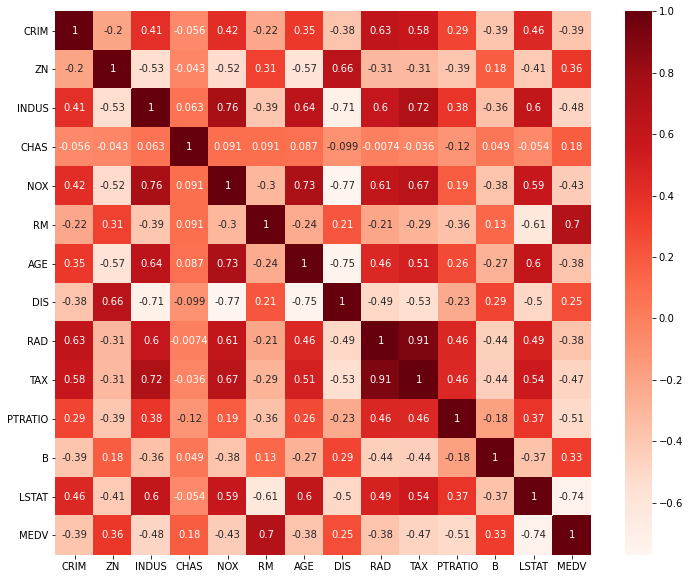

In [19]:
#Using Pearson Correlation
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True, cmap=plt.cm.Reds)
plt.show()

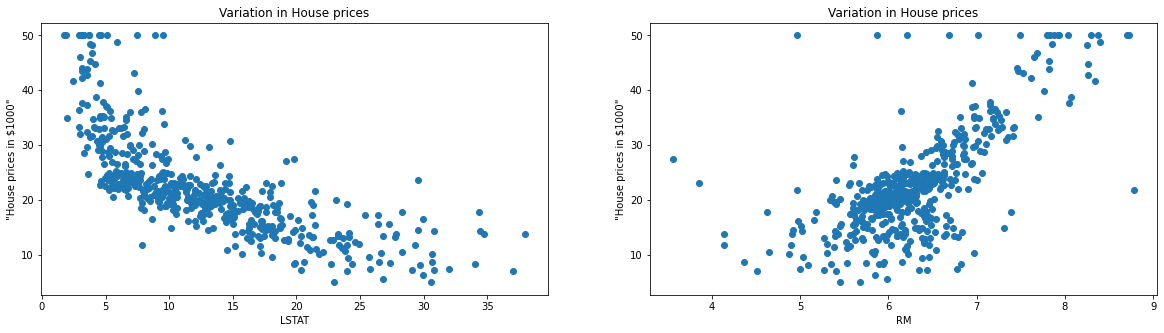

In [20]:
plt.figure(figsize=(20, 5))

features = ['LSTAT', 'RM']
target = df['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = df[col]
    y = target
    plt.scatter(x, y, marker='o')
    plt.title("Variation in House prices")
    plt.xlabel(col)
    plt.ylabel('"House prices in $1000"')

### *conclusions*_: can observe strong correlation between LSTAT, RM with MEDV_

In [21]:
# can eliminate chas as it isn't that correalted to any other feature or MEDV 
df.drop(columns=['CHAS'],inplace=True)

In [22]:
df.head()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


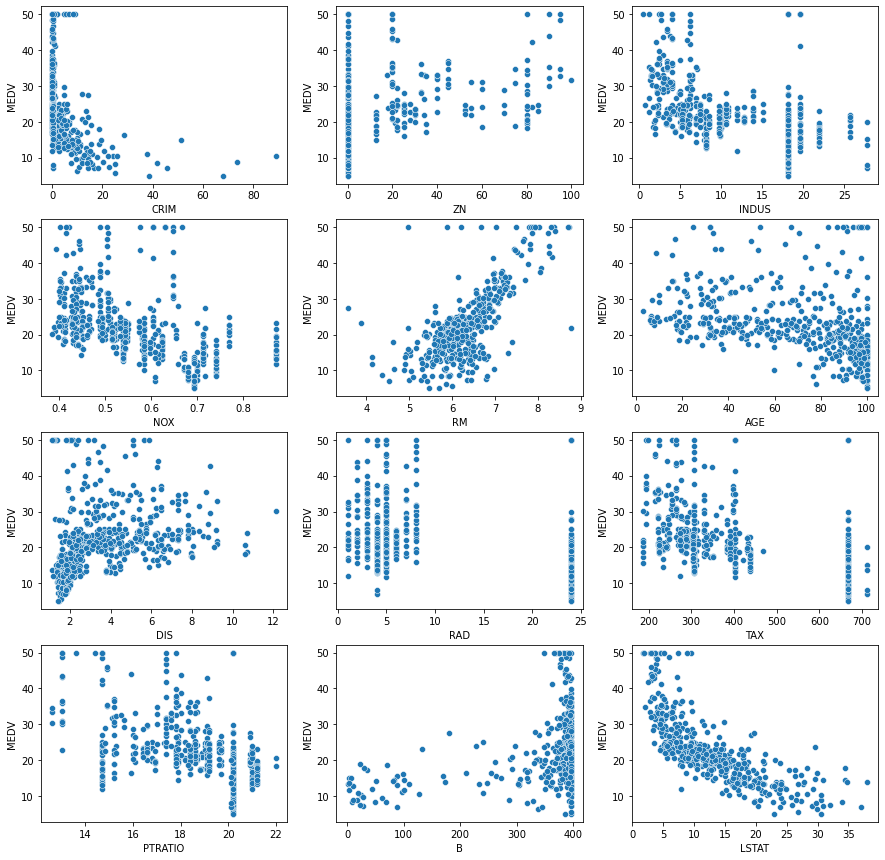

In [23]:
l = df.columns
count=0

fig, axes = plt.subplots(4, 3,figsize=(15,15)) 
for i in range(4):
    for j in range(3):
        sns.scatterplot(ax=axes[i][j], data=df, x=df[l[count]], y=df['MEDV'])
        count+=1

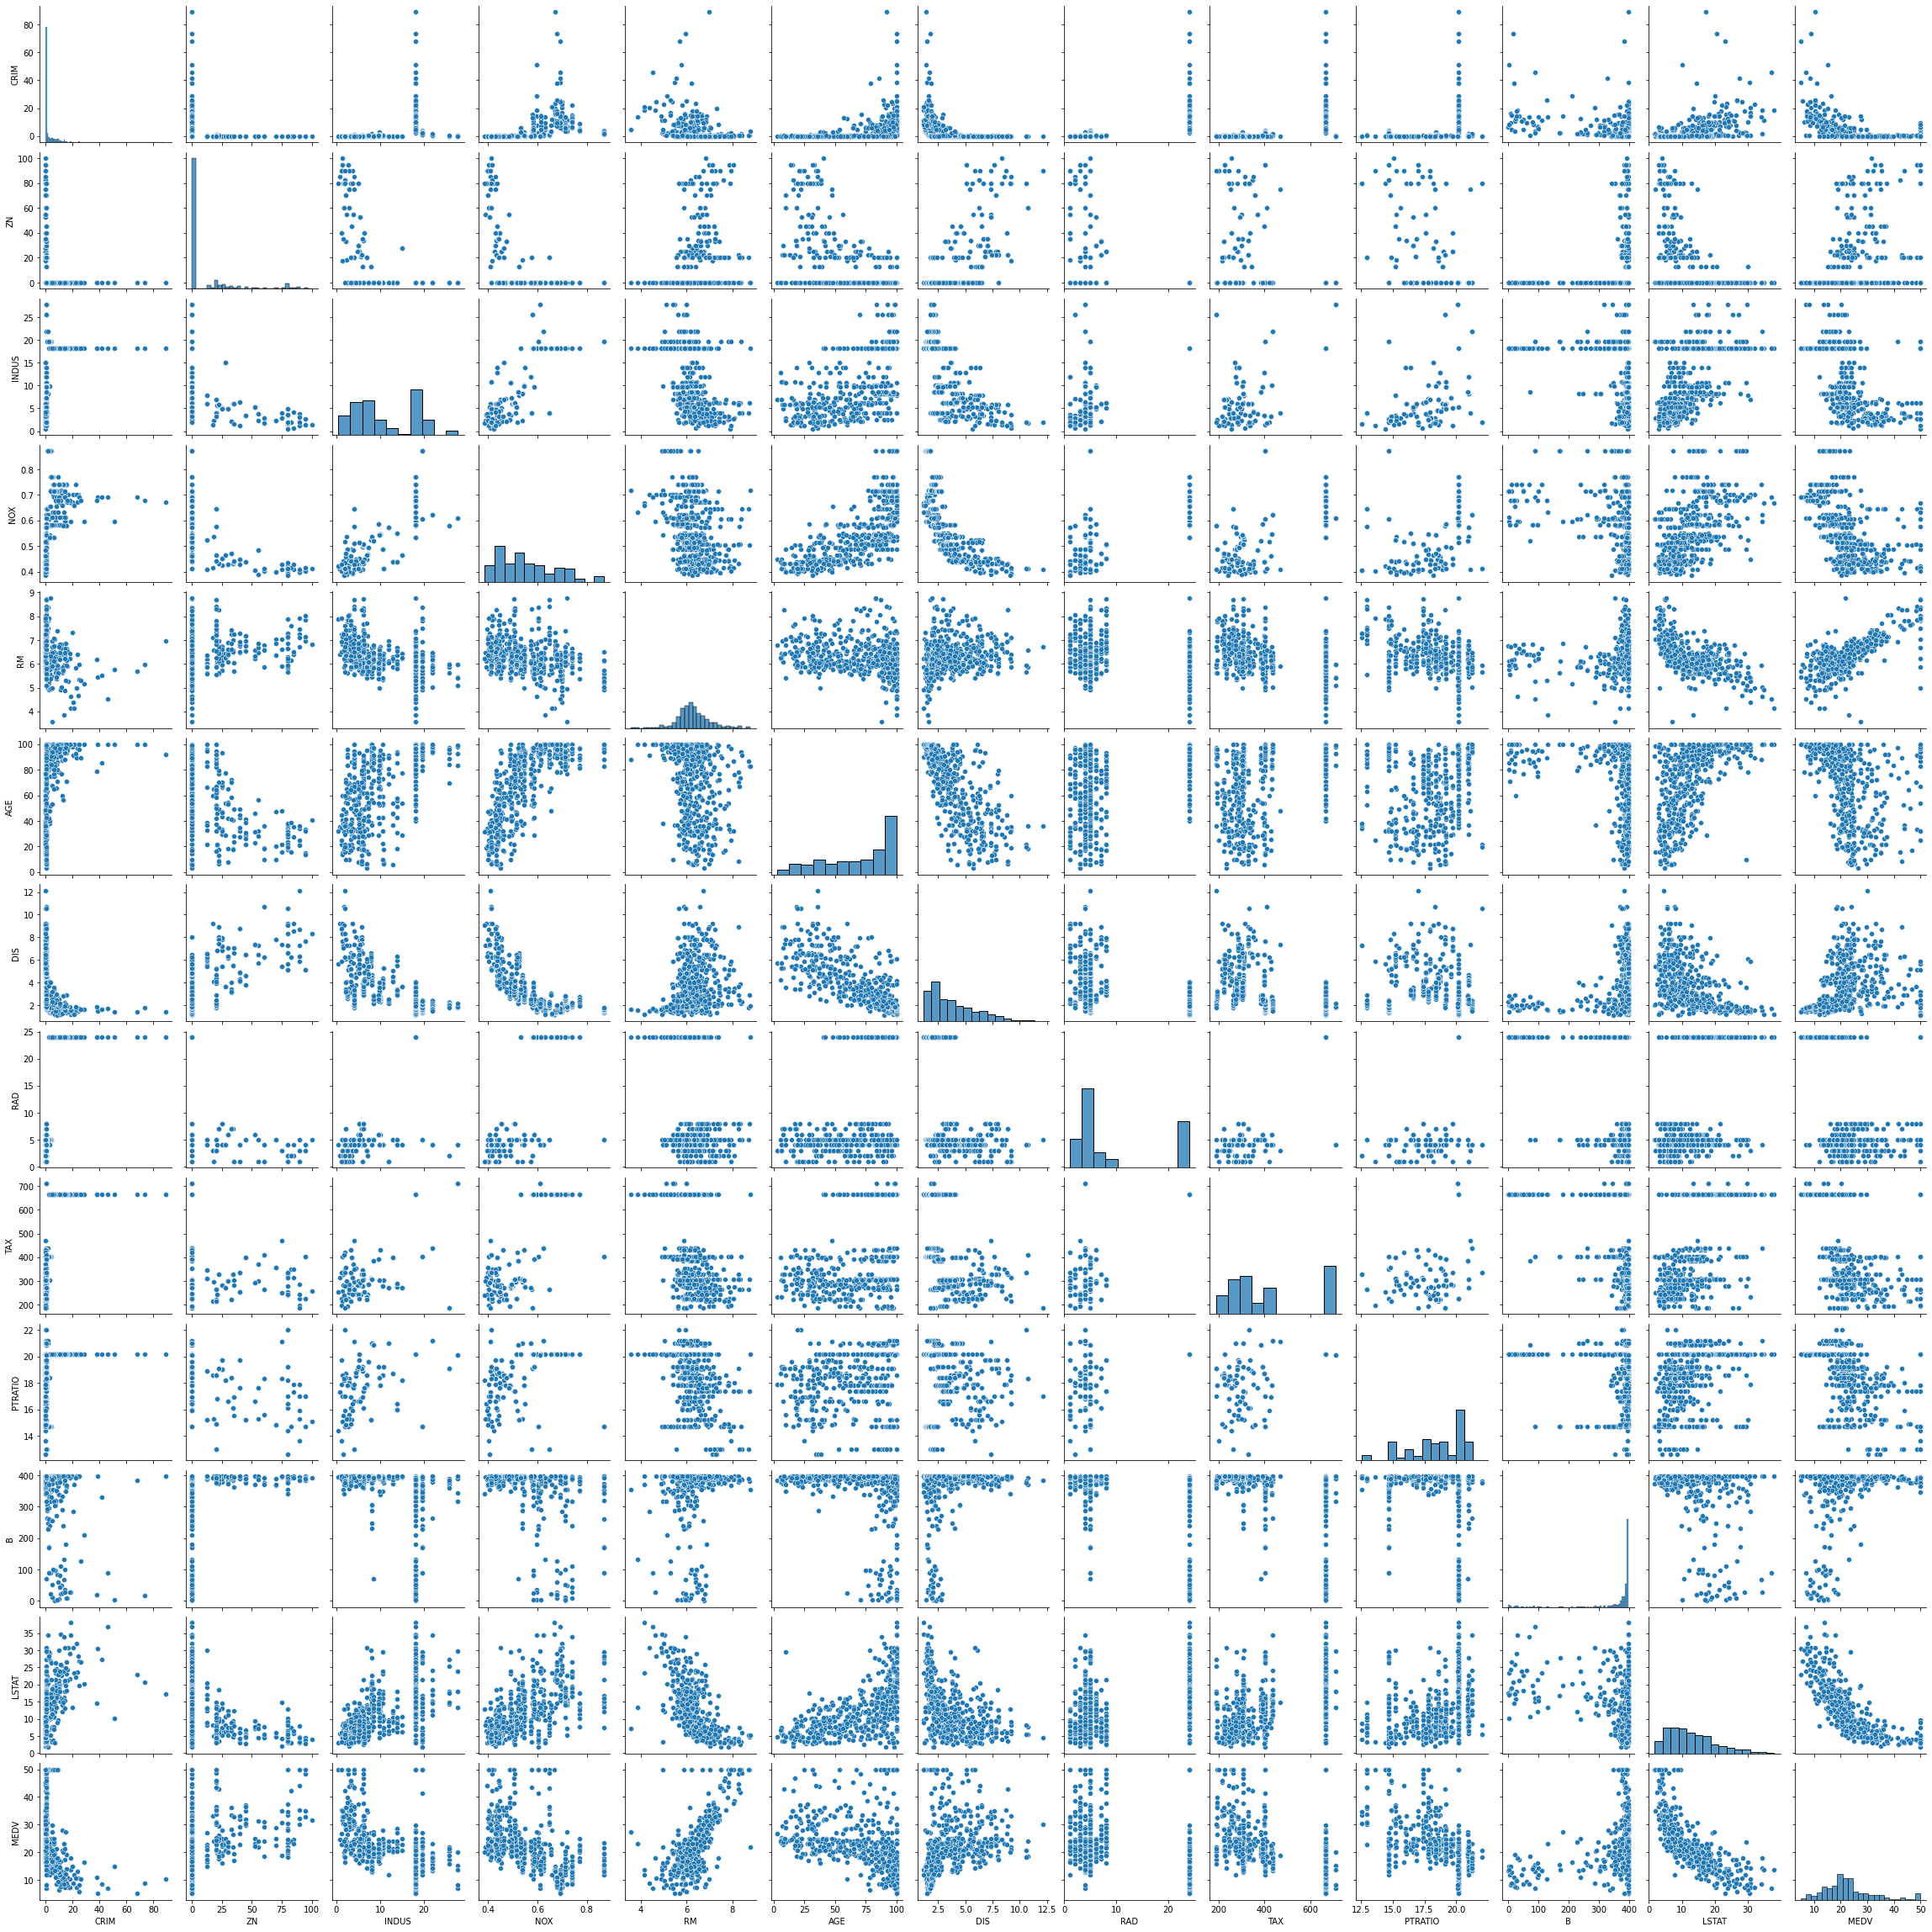

In [24]:
# plotting pair plot

sns.pairplot(data=df)

In [25]:
X = df[df.columns[:-1]]
y = df['MEDV']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=10)

In [27]:
model1 = XGBRegressor()
model1.fit(X_train,y_train)
y_pred = model1.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.592785390218099
mean square error: 12.747701286638796
root mean square error: 3.5703923155080304
r2_score : 0.8479998992324971
adjusted_r2 0.17372817408211394


In [28]:
model2 = RandomForestRegressor()
model2.fit(X_train,y_train)
y_pred = model2.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.7100784313725477
mean square error: 15.065931803921563
root mean square error: 3.8814857727320815
r2_score : 0.8153403138970716
adjusted_r2 0.16703726511887274


In [29]:
model3 = GradientBoostingRegressor()
model3.fit(X_train,y_train)
y_pred = model3.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.4892924241017718
mean square error: 12.563282933903146
root mean square error: 3.544472165767866
r2_score : 0.8475364581202308
adjusted_r2 0.173633229756883


In [30]:
model4 = AdaBoostRegressor()
model4.fit(X_train,y_train)
y_pred = model4.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 3.2786822919849428
mean square error: 18.49003985497493
root mean square error: 4.300004634296913
r2_score : 0.7472687366530666
adjusted_r2 0.15309156673825508


In [31]:
model5 = Ridge()
model5.fit(X_train,y_train)
y_pred = model5.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 4.1241712683745835
mean square error: 36.04355261936115
root mean square error: 6.003628287907334
r2_score : 0.4628551533504234
adjusted_r2 0.09482428090951878


In [32]:
model6 = Lasso()
model6.fit(X_train,y_train)
y_pred = model6.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 4.858126196863405
mean square error: 48.62927545099277
root mean square error: 6.973469398440978
r2_score : 0.04201681357285114
adjusted_r2 0.008607907040279805


| Model       |    Score     | New_Score|
| :---        |       :---:  |    :---  |
| XGBoost     |     0.84450         |  0.84799        |
| ADABoost    |     0.69899         | 0.76076        |
| Ridge       |     0.76083         |   0.46285       |
| Lasso       |     0.66400         |    0.042016      |

### 2. Wraping method

In [33]:
df = df_copy
x=df[['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'DIS', 'RAD', 'PTRATIO','LSTAT']]
y = df['MEDV']

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [35]:
lm1 = XGBRegressor()
lm1.fit(X_train,y_train)
y_pred = lm1.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.6214041205013503
mean square error: 15.906838844815645
root mean square error: 3.9883378548984094
r2_score : 0.8123944222427057
adjusted_r2 0.16643374573329273


In [36]:
lm2 = LassoCV()
lm2.fit(X_train,y_train)
y_pred = lm2.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 4.45607024614916
mean square error: 43.80179834482287
root mean square error: 6.618292706191142
r2_score : 0.16422662383466646
adjusted_r2 0.033644805288643664


In [37]:
lm3 = Lasso()
lm3.fit(X_train,y_train)
y_pred = lm3.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 4.679551326310645
mean square error: 47.863569172752214
root mean square error: 6.918350177083567
r2_score : 0.03681890521946596
adjusted_r2 0.007543021150438256


In [38]:
lm4 = Ridge()
lm4.fit(X_train,y_train)
y_pred = lm4.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 4.099003776026104
mean square error: 36.39926312855304
root mean square error: 6.033180183663757
r2_score : 0.43947142954117546
adjusted_r2 0.09003370057537263


In [39]:
lm7 = RidgeCV()
lm7.fit(X_train,y_train)
y_pred = lm7.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 4.060794488071133
mean square error: 35.65849568050503
root mean square error: 5.971473493243106
r2_score : 0.4543336686303814
adjusted_r2 0.09307850006423635


In [40]:
lm5 = RandomForestRegressor()
lm5.fit(X_train,y_train)
y_pred = lm5.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.676343137254904
mean square error: 16.690557460784316
root mean square error: 4.085407869574874
r2_score : 0.804799893706829
adjusted_r2 0.16487786869044574


In [41]:
lm6 = AdaBoostRegressor()
lm6.fit(X_train,y_train)
y_pred = lm6.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 3.3290348796153064
mean square error: 21.030834225550993
root mean square error: 4.5859387507413345
r2_score : 0.7334361995848867
adjusted_r2 0.15025772040177188


In [42]:
lm7 = GradientBoostingRegressor()
lm7.fit(X_train,y_train)
y_pred = lm7.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.3447743049362653
mean square error: 14.551558827438157
root mean square error: 3.8146505511564435
r2_score : 0.8619989225946124
adjusted_r2 0.17659612815832837


| Model       |    Score     | New_Score|
| :---        |       :---:  |    :---  |
| XGBoost     |     0.84450         |  0.90368        |
| ADABoost    |     0.69899         | 0.81427        |
| Ridge       |     0.76083         |   0.51245       |
| GradientBoosting       |     0.8543         |    0.8934      |

## Feature Engineering

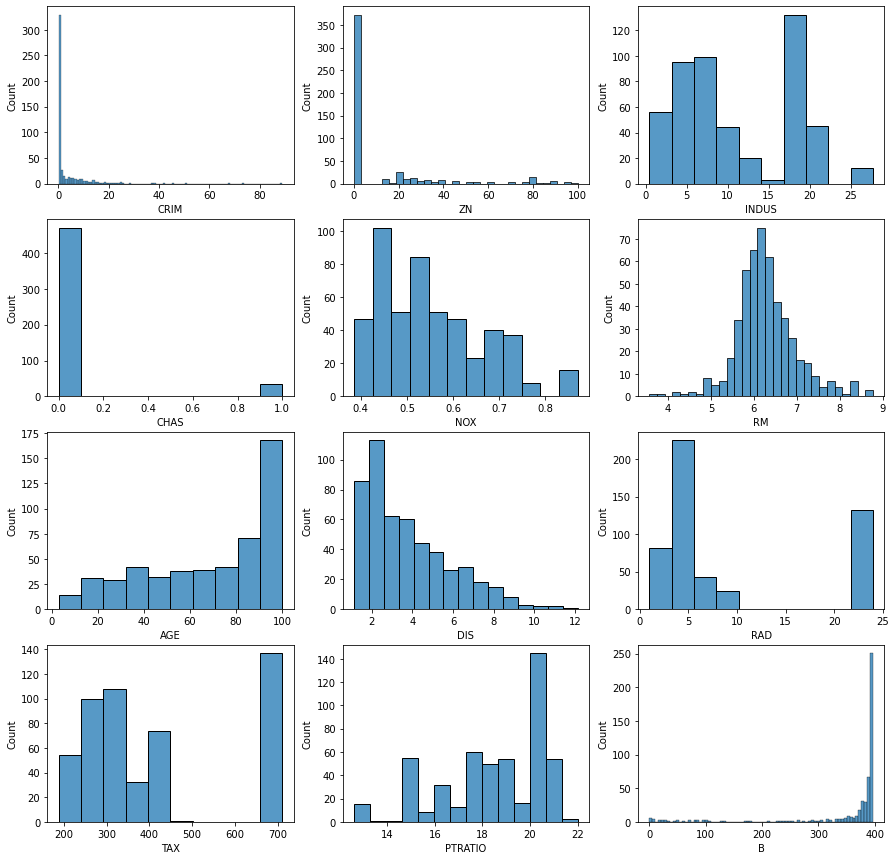

In [43]:
l = df.columns
count=0

fig, axes = plt.subplots(4, 3,figsize=(15,15)) 
for i in range(4):
    for j in range(3):
        sns.histplot(ax=axes[i][j], data=df, x=df[l[count]])
        count+=1

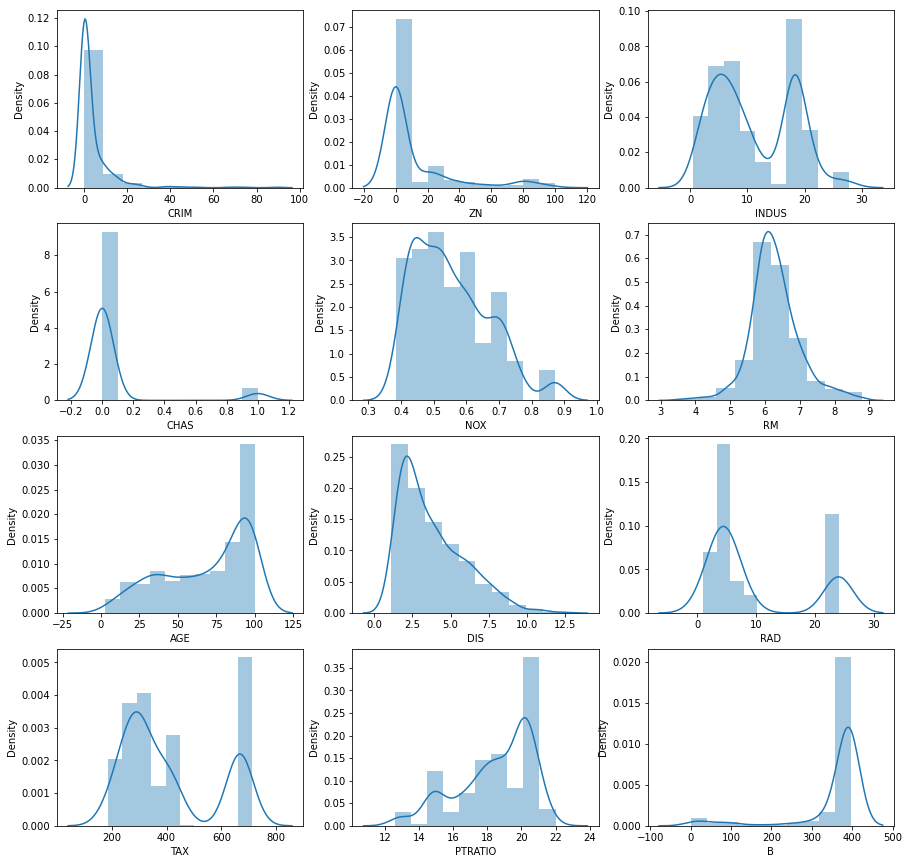

In [44]:
l = df.columns
count=0

fig, axes = plt.subplots(4, 3,figsize=(15,15)) 
for i in range(4):
    for j in range(3):
        sns.distplot(ax=axes[i][j], a=df[l[count]],bins=10)
        count+=1

IndexError: index 12 is out of bounds for axis 0 with size 12

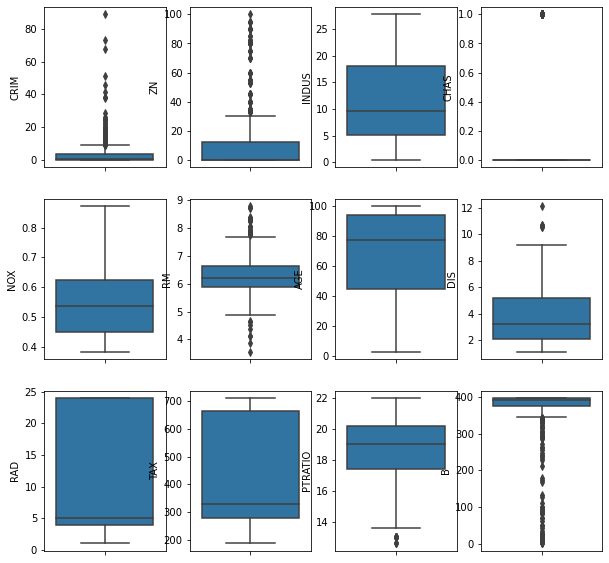

In [51]:
#Plotting boxplots to see if there are any outliers in our data (considering data betwen 25th and 75th percentile as non outlier)
fig, ax = plt.subplots(ncols=4, nrows=3, figsize=(10, 10))
ax = ax.flatten()
index = 0
for i in df.columns:
    sns.boxplot(y=i, data=df, ax=ax[index])
    index +=1
plt.tight_layout(pad=0.4)
plt.show()

In [52]:
## Outlier Treatment

for col in df.columns[:-1]:
    print(f"Highest allowed {col}",df[col].mean() + 3*df[col].std())
    print(f"Lowest allowed {col}",df[col].mean() - 3*df[col].std())

Highest allowed CRIM 29.418158873309714
Lowest allowed CRIM -22.19111175868521
Highest allowed ZN 81.33099534718147
Lowest allowed ZN -58.60372261990875
Highest allowed INDUS 31.717837478819256
Lowest allowed INDUS -9.44428016656625
Highest allowed CHAS 0.8311520844955438
Lowest allowed CHAS -0.6928121635469271
Highest allowed NOX 0.9023280862912055
Lowest allowed NOX 0.20706203228586895
Highest allowed RM 8.392485817597757
Lowest allowed RM 4.176782957105816
Highest allowed AGE 153.0214854064817
Lowest allowed AGE -15.871683034940133
Highest allowed DIS 10.112173067629865
Lowest allowed DIS -2.5220876921357975
Highest allowed RAD 35.671185267342636
Lowest allowed RAD -16.57237103809362
Highest allowed TAX 913.8485023150754
Lowest allowed TAX -97.37419401468014
Highest allowed PTRATIO 24.950370167981305
Lowest allowed PTRATIO 11.960697025694628
Highest allowed B 630.5586247730259
Lowest allowed B 82.7894384680792
Highest allowed LSTAT 34.07624777515244
Lowest allowed LSTAT -8.770121292

In [53]:
for col in df.columns[:-1]:
    high = df[col].mean() + 3*df[col].std()
    low = df[col].mean() - 3*df[col].std()
    mean = float(df[col].mean())
    df[col] = np.where(df[col] > mean, mean, df[col])

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,11.363636,2.31,0.0,0.538,6.284634,65.200000,3.795043,1.0,296.0,15.300000,356.674032,4.98,24.0
1,0.02731,0.000000,7.07,0.0,0.469,6.284634,68.574901,3.795043,2.0,242.0,17.800000,356.674032,9.14,21.6
2,0.02729,0.000000,7.07,0.0,0.469,6.284634,61.100000,3.795043,2.0,242.0,17.800000,356.674032,4.03,34.7
3,0.03237,0.000000,2.18,0.0,0.458,6.284634,45.800000,3.795043,3.0,222.0,18.455534,356.674032,2.94,33.4
4,0.06905,0.000000,2.18,0.0,0.458,6.284634,54.200000,3.795043,3.0,222.0,18.455534,356.674032,5.33,36.2


# FROM here

In [147]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()
X = boston.data
y = boston.target

In [54]:
### optimum number of clusters

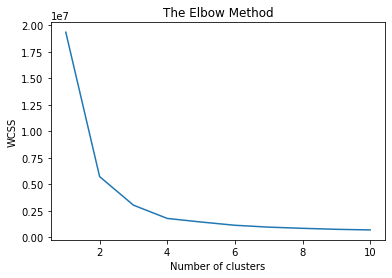

In [148]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 35)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [149]:
# optimum = 2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['new_1'] = kmeans.labels_
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,new_1
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0


In [150]:
from sklearn.cluster import DBSCAN,MiniBatchKMeans,MeanShift,SpectralClustering,OPTICS,AgglomerativeClustering

In [151]:
df['new_2'] = DBSCAN().fit(X).labels_

In [152]:
df['new_3'] = MiniBatchKMeans().fit(X).labels_

In [153]:
df['new_4'] = MeanShift().fit(X).labels_

In [154]:
df['new_5'] = OPTICS().fit(X).labels_

In [155]:
from sklearn.decomposition import PCA,NMF,KernelPCA,MiniBatchSparsePCA

In [156]:
X_new = PCA().fit_transform(X)

In [162]:
df['new_6'] = (X_new[:,0]+X_new[:,1]+X_new[:,2]+X_new[:,3]+X_new[:,4]+X_new[:,5]+X_new[:,6]+X_new[:,7]+X_new[:,8]+X_new[:,9]+X_new[:,10]+X_new[:,11]+X_new[:,12])/13

In [163]:
X_new = KernelPCA().fit_transform(X)
df['new_7'] = (X_new[:,0]+X_new[:,1]+X_new[:,2]+X_new[:,3]+X_new[:,4]+X_new[:,5]+X_new[:,6]+X_new[:,7]+X_new[:,8]+X_new[:,9]+X_new[:,10]+X_new[:,11]+X_new[:,12])/13

In [164]:
X_new = MiniBatchSparsePCA().fit_transform(X)
df['new_8'] = (X_new[:,0]+X_new[:,1]+X_new[:,2]+X_new[:,3]+X_new[:,4]+X_new[:,5]+X_new[:,6]+X_new[:,7]+X_new[:,8]+X_new[:,9]+X_new[:,10]+X_new[:,11]+X_new[:,12])/13

In [165]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,new_1,new_2,new_3,new_4,new_5,new_6,new_7,new_8
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0,0,-1,4,0,-1,-9.913037,-9.913037,-39.681622
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6,0,-1,3,0,-1,-14.550457,-14.550457,-57.608190
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7,0,-1,3,0,8,-14.253194,-14.253194,-58.570868
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4,0,-1,3,0,-1,-15.610482,-15.610482,-66.765989
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2,0,-1,3,0,-1,-15.828525,-15.828525,-66.369655


In [166]:
X = df.drop(columns='MEDV')
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [167]:
lm1 = XGBRegressor()
lm1.fit(X_train,y_train)
y_pred = lm1.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.29808910594267
mean square error: 15.647978347907205
root mean square error: 3.955752564039769
r2_score : 0.8068210604698713
adjusted_r2 0.1683655518749112


In [168]:
lm5 = RandomForestRegressor()
lm5.fit(X_train,y_train)
y_pred = lm5.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.1915490196078427
mean square error: 15.16099366666666
root mean square error: 3.8937120677660104
r2_score : 0.7922275990424099
adjusted_r2 0.16532022211422193


In [169]:
lm6 = AdaBoostRegressor()
lm6.fit(X_train,y_train)
y_pred = lm6.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.862537241124497
mean square error: 15.969360858383956
root mean square error: 3.9961682720305904
r2_score : 0.7292924170721026
adjusted_r2 0.15218705397579002


In [170]:
lm7 = GradientBoostingRegressor()
lm7.fit(X_train,y_train)
y_pred = lm7.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.25047011838289
mean square error: 13.302097704996388
root mean square error: 3.6472040942338815
r2_score : 0.8169958561164217
adjusted_r2 0.17048880468545158


| Model       |    New_Score     | Score|
| :---        |       :---:  |    :---  |
| XGBoost     |     0.81         |  0.84        |
| ADABoost    |     0.69        | 0.71427        |
| GradientBoosting       |     0.81        |    0.8534      |
| RandomForest | 0.79 | 0.81|

In [171]:
## Feature selection
from sklearn.feature_selection import RFE

model = XGBRegressor()
rfe = RFE(model,7)
X_rfe = rfe.fit_transform(X,y)
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[False False False False  True  True False  True False  True  True False
  True False False False False False  True False False]
[ 3 11  2  9  1  1  5  1  8  1  1  7  1 13 14  6 15 10  1 12  4]


In [172]:
cols = list(X.columns)
model = XGBRegressor()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'new_6',
       'new_8'],
      dtype='object')


In [173]:
X = df[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'new_6',
       'new_8']]
y = df['MEDV']

In [174]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [175]:
lm7 = GradientBoostingRegressor()
lm7.fit(X_train,y_train)
y_pred = lm7.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.124785718415984
mean square error: 11.046416400123679
root mean square error: 3.3236149596672115
r2_score : 0.898762120513113
adjusted_r2 0.18338378620570595


In [176]:
lm6 = AdaBoostRegressor()
lm6.fit(X_train,y_train)
y_pred = lm6.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.704784855944522
mean square error: 13.88632386310211
root mean square error: 3.726435812287944
r2_score : 0.8411859959347057
adjusted_r2 0.171635930483647


In [177]:
lm5 = RandomForestRegressor()
lm5.fit(X_train,y_train)
y_pred = lm5.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.222578431372551
mean square error: 14.52618602941179
root mean square error: 3.8113233960675377
r2_score : 0.8645023674006049
adjusted_r2 0.1763934123383053


In [178]:
lm1 = XGBRegressor()
lm1.fit(X_train,y_train)
y_pred = lm1.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.204053431866216
mean square error: 13.675221822646693
root mean square error: 3.6980024097675614
r2_score : 0.8803492458665253
adjusted_r2 0.17962681582327078


| Model       |    New_Score     | Score|
| :---        |       :---:  |    :---  |
| XGBoost     |     0.88         |  0.84        |
| ADABoost    |     0.84        | 0.71427        |
| GradientBoosting       |     0.90        |    0.8534      |
| RandomForest | 0.86 | 0.81|

In [180]:
import pickle
pickle.dump(lm1,open('XGBoost1.sav','wb'))
pickle.dump(lm5,open('RandomForest1.sav','wb'))
pickle.dump(lm6,open('AdaBoost1.sav','wb'))
pickle.dump(lm7,open('GradientBoost1.sav','wb'))

# Some other Model Try

In [106]:
boston = load_boston()
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [107]:
X = boston.data
y = boston.target
features = boston.feature_names
print(features)
df

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [111]:
df = pd.DataFrame(data=boston.data, columns=boston.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [112]:
df['MEDV'] = boston.target
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


### Model Selection Wraping Method

In [113]:
## Feature selection
from sklearn.feature_selection import RFE

model = XGBRegressor()
rfe = RFE(model,7)
X_rfe = rfe.fit_transform(X,y)
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

[ True False False False  True  True False  True False  True  True False
  True]
[1 7 3 6 1 1 4 1 2 1 1 5 1]


In [114]:
cols = df.columns[:-1]
model = XGBRegressor()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO',
       'LSTAT'],
      dtype='object')


In [115]:
X = df[['CRIM', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO','LSTAT']]
y = df['MEDV']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [117]:
lm7 = GradientBoostingRegressor()
lm7.fit(X_train,y_train)
y_pred = lm7.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 1.8997095988870571
mean square error: 5.992786337863628
root mean square error: 2.4480168173163412
r2_score : 0.8935980267526564
adjusted_r2 0.18233010242831982


In [118]:
lm6 = AdaBoostRegressor()
lm6.fit(X_train,y_train)
y_pred = lm6.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.5119672941812783
mean square error: 9.164642604390469
root mean square error: 3.0273160727599073
r2_score : 0.7944345198215932
adjusted_r2 0.16209674040804223


In [119]:
lm5 = RandomForestRegressor()
lm5.fit(X_train,y_train)
y_pred = lm5.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 2.0509117647058814
mean square error: 7.765012460784313
root mean square error: 2.786577194477898
r2_score : 0.8628064733147112
adjusted_r2 0.1760473814238097


In [120]:
lm1 = XGBRegressor()
lm1.fit(X_train,y_train)
y_pred = lm1.predict(X_test)
print('mean absolute error:',mean_absolute_error(y_pred,y_test))
print('mean square error:',mean_squared_error(y_pred,y_test))
print('root mean square error:',math.sqrt(mean_squared_error(y_pred,y_test)))
print('r2_score :',r2_score(y_pred,y_test))
r2 = r2_score(y_pred,y_test)
print('adjusted_r2',1 - (1-r2*(len(y_test)-1)/(len(y)-X_test.shape[1]-1)))

mean absolute error: 1.8346558842004514
mean square error: 6.464688726875193
root mean square error: 2.5425752155787236
r2_score : 0.8873302814915819
adjusted_r2 0.1810512291528278


| Model       |    New_Score     | Score|
| :---        |       :---:  |    :---  |
| XGBoost     |     0.88         |  0.84        |
| ADABoost    |     0.84        | 0.71427        |
| GradientBoosting       |     0.89        |    0.8534      |
| RandomForest | 0.86 | 0.81|

In [121]:
import pickle

In [122]:
pickle.dump(lm1,open('XGBoost.sav','wb'))
pickle.dump(lm5,open('RandomForest.sav','wb'))
pickle.dump(lm6,open('AdaBoost.sav','wb'))
pickle.dump(lm7,open('GradientBoost.sav','wb'))

## Building Super Learner

In [181]:
import pickle

In [188]:
gb = pickle.load(open('GradientBoost1.sav','rb'))
rf = pickle.load(open('XGBoost1.sav','rb'))
xgb = pickle.load(open('RandomForest1.sav','rb'))

In [191]:
df = pd.DataFrame(boston.data,columns=boston.feature_names)
df['MEDV'] = boston.target
df.head()
X = boston.data
y = boston.target

In [192]:
from sklearn.cluster import DBSCAN,MiniBatchKMeans,MeanShift,SpectralClustering,OPTICS,AgglomerativeClustering
from sklearn.decomposition import PCA,NMF,KernelPCA,MiniBatchSparsePCA
# optimum = 2
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)
df['new_1'] = kmeans.labels_
db = DBSCAN().fit(X)
df['new_2'] = db.labels_
mb = MiniBatchKMeans().fit(X)
df['new_3'] = mb.labels_
ms = MeanShift().fit(X)
df['new_4'] = ms.labels_
op = OPTICS().fit(X)
df['new_5'] = op.labels_
X_pca = PCA().fit_transform(X)
df['new_6'] = (X_pca[:,0]+X_pca[:,1]+X_pca[:,2]+X_pca[:,3]+X_pca[:,4]+X_pca[:,5]+X_pca[:,6]+X_pca[:,7]+X_pca[:,8]+X_pca[:,9]+X_pca[:,10]+X_pca[:,11]+X_pca[:,12])/13
X_kpca = KernelPCA().fit_transform(X)
df['new_7'] = (X_kpca[:,0]+X_kpca[:,1]+X_kpca[:,2]+X_kpca[:,3]+X_kpca[:,4]+X_kpca[:,5]+X_kpca[:,6]+X_kpca[:,7]+X_kpca[:,8]+X_kpca[:,9]+X_kpca[:,10]+X_kpca[:,11]+X_kpca[:,12])/13
X_mbpca = MiniBatchSparsePCA().fit_transform(X)
df['new_8'] = (X_mbpca[:,0]+X_mbpca[:,1]+X_mbpca[:,2]+X_mbpca[:,3]+X_mbpca[:,4]+X_mbpca[:,5]+X_mbpca[:,6]+X_mbpca[:,7]+X_mbpca[:,8]+X_mbpca[:,9]+X_mbpca[:,10]+X_mbpca[:,11]+X_mbpca[:,12])/13

In [194]:
X = df[df.columns[:-1]]
y = df['MEDV']

In [195]:
## Feature selection
from sklearn.feature_selection import RFE

model = XGBRegressor()
rfe = RFE(model,7)
X_rfe = rfe.fit_transform(X,y)
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)
cols = df.columns[:-1]
model = XGBRegressor()
#Initializing RFE model
rfe = RFE(model, 10)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

[False False False False False False  True False  True False  True  True
  True  True False False False False False  True False]
[ 8  7  9  4 11  6  1  2  1 10  1  1  1  1 13 14  5 12  3  1 15]
Index(['CHAS', 'AGE', 'DIS', 'RAD', 'PTRATIO', 'B', 'LSTAT', 'MEDV', 'new_5',
       'new_6'],
      dtype='object')


In [196]:
X = df[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'new_6','new_8']]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [202]:
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import confusion_matrix

In [198]:
estimators = [('Gradient Boosting', gb), ('Random Forest', rf),('XGBoost',xgb)]

In [199]:
clf = StackingRegressor(estimators)

In [200]:
clf.fit(X_train,y_train)

StackingRegressor(estimators=[('Gradient Boosting',
                               GradientBoostingRegressor()),
                              ('Random Forest',
                               XGBRegressor(base_score=0.5, booster='gbtree',
                                            colsample_bylevel=1,
                                            colsample_bynode=1,
                                            colsample_bytree=1,
                                            enable_categorical=False, gamma=0,
                                            gpu_id=-1, importance_type=None,
                                            interaction_constraints='',
                                            learning_rate=0.300000012,
                                            max_delta_step=0, max_depth=6,
                                            min_child_weight=1, missing=nan,
                                            monotone_constraints='()',
                                            n_

In [201]:
clf.score(X_test,y_test)

0.9226257493547527

In [204]:
#make predictions
y_pred = clf.predict(X_test)
r2_score(y_test,y_pred)

0.9226257493547527

In [205]:
pickle.dump(clf,open('final.sav','wb'))

## Model Deployment 

In [207]:
import streamlit as st

In [224]:
model = pickle.load(open('Final.sav','rb'))
def predict(X):
    pred = model.predict(X)
    return pred
def main():
    crim = st.number_input('CRIM',0.00,100.00)
    zn = st.number_input('ZN',0.00,100.00)
    indus = st.number_input('INDUS',0.00,30.00)
    chas = st.number_input('CHAS',0.00,1.00)
    nox = st.number_input('NOX',0.00,1.00)
    rm = st.number_input('RM',2.00,10.00)
    age = st.number_input('AGE',0,100)
    dis = st.number_input('DIS',0.00,15.0)
    rad = st.number_input('RAD',1.00,25.00)
    tax = st.number_input('TAX',150.00,750.00)
    ptr = st.number_input('PTRATIO',10.00,25.00)
    b = st.number_input('B',0.00,400.00)
    lstat = st.number_input('LSTAT',1.00,40.00)
    df = pd.DataFrame({'CRIM':crim,'ZN':zn,'INDUS':indus,'CHAS':chas,'NOX':nox,
                       'RM':rm,'AGE':age,'DIS':dis,'RAD':rad,'TAX':tax,'PTRATIO':ptr,
                      'B':b,'LSTAT':lstat},columns=['CRIM' ,'ZN' ,'INDUS' ,'CHAS' ,'NOX' ,'RM' ,'AGE' ,'DIS' ,'RAD' ,'TAX' ,'PTRATIO','B' ,'LSTAT'],index=[0])
    X = df
    kmeans = KMeans(n_clusters=1, random_state=0).fit(X)
    df['new_1'] = kmeans.labels_
    db = DBSCAN().fit(X)
    df['new_2'] = db.labels_
    mb = MiniBatchKMeans(n_clusters=1).fit(X)
    df['new_3'] = mb.labels_
    ms = MeanShift().fit(X)
    df['new_4'] = ms.labels_
    #op = 0
    df['new_5'] = 0
    X_pca = PCA().fit_transform(X)
    df['new_6'] = X_pca
    X_kpca = KernelPCA().fit_transform(X)
    df['new_7'] = sum(X_kpca[0])
    X_mbpca = MiniBatchSparsePCA().fit_transform(X)
    df['new_8'] = sum(X_mbpca[0])
    X = df[['CRIM', 'INDUS', 'NOX', 'RM', 'DIS', 'TAX', 'PTRATIO', 'LSTAT', 'new_6','new_8']]
    
    if st.button('PREDICT'):
        out = predict(X)
        st.success(out)

if __name__=='__main__':
    main()